In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
iris = pd.read_csv("http://gagolewski.com/resources/data/iris.csv", comment="#")
tips = pd.read_csv("http://gagolewski.com/resources/data/tips.csv", comment="#")
vehicles = pd.read_csv("http://gagolewski.com/resources/data/fueleconomy_vehicles.csv.gz", comment="#")
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
weather = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz", comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_flights.csv.gz", comment="#")
airports = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_airports.csv.gz", comment="#")
airlines = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_airlines.csv.gz", comment="#")
planes = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_planes.csv.gz", comment="#")

In [4]:
vehicles.head(1)

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18


Given `fueleconomy::vehicles`, convert the values in
`cty` (city-) and `hwy` (highway-fuel economy -- given in mpg)
to l/100 km. Then add  new columns `z_cty` and `z_hwy`,
that give z-scores of `cty` and `hwy` (i.e., standardize these columns).
Moreover, add  two other columns `z_cty_rel` and `z_hwy_rel`, which denote the
corresponding z-scores relative to (grouped by) `class`.

In [9]:
vehicles.loc[:,"cty2"] = 235.215/vehicles.loc[:,"cty"]
vehicles.loc[:,"cty2"].head()

0    13.067500
1    13.067500
2    18.093462
3    18.093462
4    14.700938
Name: cty2, dtype: float64

In [10]:
vehicles.loc[:,"z_cty"] =                            \
    (vehicles.loc[:,"cty2"]-vehicles.loc[:,"cty2"].mean())/vehicles.loc[:,"cty2"].std()


In [11]:
vehicles.loc[:,"z_cty"].head()

0   -0.365269
1   -0.365269
2    1.020516
3    1.020516
4    0.085111
Name: z_cty, dtype: float64

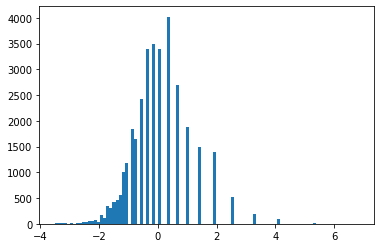

In [14]:
plt.hist(vehicles["z_cty"], bins=100);

In [15]:
vehicles.loc[:,"z_cty_rel"] = vehicles.groupby("class")["cty2"].transform(
    lambda cty_grouped: (cty_grouped-cty_grouped.mean())/cty_grouped.std()
)

In [16]:
def standardise(x): 
    return (x-x.mean())/x.std()
    
vehicles.loc[:,"z_cty_rel"] = vehicles.groupby("class")["cty2"].transform(standardise)
vehicles.loc[:,"z_cty_rel"].head()

0   -0.742395
1   -0.742395
2    0.801337
3    0.801337
4   -0.240682
Name: z_cty_rel, dtype: float64

In [20]:
vehicles[["ctyr","hwyr"]]=    \
    vehicles.groupby("class")[["cty","hwy"]].transform(standardise)
vehicles.head(1)

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty,cty2,z_cty,z_cty_rel,ctyr,hwyr
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18,13.0675,-0.365269,-0.742395,0.517432,-0.702538


In [21]:
standardise(vehicles.loc[:6,["cty", "hwy"]])

,cty,hwy
0,1.299038,0.377964
1,1.299038,0.377964
2,-0.866025,-0.944911
3,-0.866025,-0.944911
4,0.433013,0.377964
5,-0.866025,-0.944911
6,-0.433013,1.700840


## New York City Flights examples
Here, we will work on exercises to switch back and forth between SQL queries and python (pandas) syntax for pulling the same data.

In [31]:
# NYC flights 2013
flights.shape

(336776, 19)

In [32]:
flights.head(1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00


In [33]:
airlines.tail(5)

,carrier,name
11,UA,United Air Lines Inc.
12,US,US Airways Inc.
13,VX,Virgin America
14,WN,Southwest Airlines Co.
15,YV,Mesa Airlines Inc.


In [34]:
planes.head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan


In [35]:
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [36]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [37]:
import sqlite3

In [38]:
conn = sqlite3.connect("/tmp/nycflights.db") # you: nycflights.db

In [39]:
flights.to_sql("flights", conn)
weather.to_sql("weather", conn)
planes.to_sql("planes", conn)
airports.to_sql("airports", conn)
airlines.to_sql("airlines", conn)

In [40]:
pd.read_sql_query("""
    SELECT * FROM airlines  WHERE name LIKE '%AMERICA%'
""", conn)

,index,carrier,name
0,1,AA,American Airlines Inc.
1,13,VX,Virgin America


   1. `SELECT DISTINCT engine FROM planes`
   

In [83]:
pd.read_sql_query("""SELECT DISTINCT engine FROM planes""", conn)

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


Python: 

   2. `SELECT DISTINCT type, engine FROM planes`
   

Python:

   3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`
   

Python:

   4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`
   

Python:

   5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`

Python:

   6. `SELECT * FROM planes WHERE speed IS NOT NULL`
   

Python:

   7. `SELECT tailnum FROM planes WHERE seats BETWEEN 150 AND 190 AND year >= 2012`
   

Python:

   8. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>390`

Python:

   9. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC`
   10. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC`
   

   11. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer`


Python:

   12. `SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10`

Python:

   13. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 5`   

Python:

   14. `SELECT * FROM flights LEFT JOIN planes ON flights.tailnum=planes.tailnum`
   

Python:

   15.

      ```
      SELECT planes.*, airlines.* FROM
       (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
      INNER JOIN planes ON cartail.tailnum=planes.tailnum
      INNER JOIN airlines ON cartail.carrier=airlines.carrier
      ```
      

Python: